In [25]:
# Install TensorFlow
#!pip install tensorflow

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.2.0


In [0]:
# More imports
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # Scales them to be between 0 and 1

In [0]:
x_train[0].shape
K = 10

# Build Model

In [0]:
i = Input(x_train[0].shape)
x = LSTM(256)(i) # 256 neurons - can be anywhere between 10 and 784
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               291840    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 294,410
Trainable params: 294,410
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
r = model.fit(x_train, y_train,
              validation_data = (x_test, y_test),
              epochs=15)

Epoch 1/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3005 - accuracy: 0.9027 - val_loss: 0.1353 - val_accuracy: 0.9572
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0926 - accuracy: 0.9716 - val_loss: 0.0916 - val_accuracy: 0.9739
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0629 - accuracy: 0.9809 - val_loss: 0.0624 - val_accuracy: 0.9798
Epoch 4/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0497 - accuracy: 0.9850 - val_loss: 0.0441 - val_accuracy: 0.9863
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0394 - accuracy: 0.9883 - val_loss: 0.0559 - val_accuracy: 0.9840
Epoch 6/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0332 - accuracy: 0.9902 - val_loss: 0.0322 - val_accuracy: 0.9901
Epoch 7/15
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0278 - accuracy: 0.9917 - val_loss: 0.0383 - val_accuracy:

# Evaluate Model

Text(0.5, 0, 'Epoch')

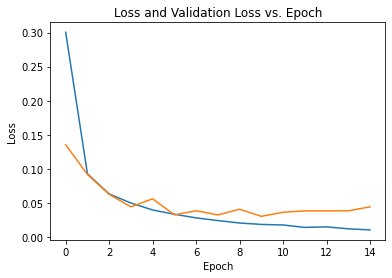

In [37]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='loval_lossss')
plt.title("Loss and Validation Loss vs. Epoch")
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(33.0, 0.5, 'True Label')

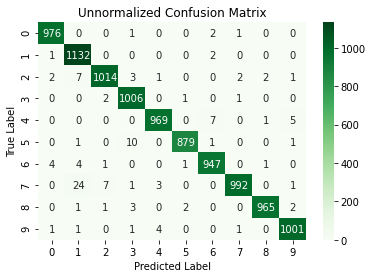

In [38]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

predictions = model.predict(x_test).argmax(axis=1) # Need to take argmax to get class number with highest probability for each sample
colormap = confusion_matrix(y_test, predictions)
import seaborn as sns
ax = sns.heatmap(colormap, annot=True, fmt='d', cmap='Greens')
ax.set_title("Unnormalized Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")



(10, 10)
(10, 10)


Text(69.0, 0.5, 'True Label')

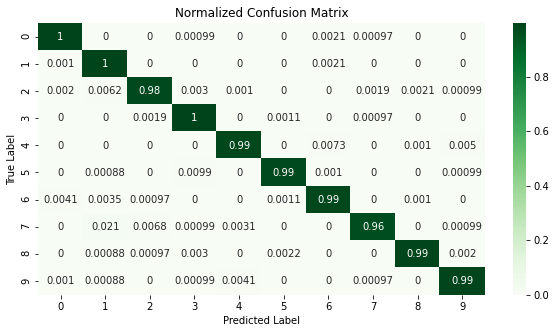

In [46]:
plt.figure(figsize=(10,5))
colormap_normalized = colormap.astype('float') / colormap.sum(axis=1)
print(colormap.shape)
print(colormap_normalized.shape)
plt.figure
ax = sns.heatmap(colormap_normalized, annot=True, cmap='Greens')
ax.set_title("Normalized Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")

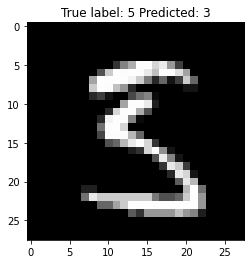

In [48]:
# Show some misclassified examples
misclassified_idx = np.where(predictions != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], predictions[i]));

In [0]:
# More neurons seemed to improve model performance without increasing validation loss.